![Polars](img/polars.svg)

In [1]:
import polars as pl
from datetime import datetime
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import random
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from pathlib import Path
pl.__version__

'0.20.31'

In [2]:
def get_metrics(sentence: str, repeat: int)-> list:
    init_total = time.time()
    res = []
    for _ in range(repeat):
        last_run = time.time()
        exec(sentence)
        res.append(time.time() - last_run)
    print('Tiempo de ejecución:', time.time() - init_total, 'segundos')
    return res

In [3]:
NUM_REP=20

### Cargar el dataset
"Este dataset de Spotify de todos los gráficos "Top 200" y "Viral 50" publicados globalmente. Spotify publica un nuevo gráfico cada 2 o 3 días. Esta es su colección completa desde el 1 de enero de 2019 que  contiene 29 columnas por cada fila que se relleno utilizando la API de Spotify".

https://www.kaggle.com/datasets/sunnykakar/spotify-charts-all-audio-data/

In [4]:
total_metrics = pl.DataFrame()
total_metrics = total_metrics.with_columns(pl.Series(name="Load", values=get_metrics("df = pl.read_csv('dataset/spotify_min.csv')",NUM_REP)) )
df = pl.read_csv("dataset/spotify_min.csv")
df

Tiempo de ejecución: 41.61387586593628 segundos


,Unnamed: 0,title,rank,date,artist,url,region,chart,trend,streams,track_id,album,popularity,duration_ms,explicit,release_date,available_markets,af_danceability,af_energy,af_key,af_loudness,af_mode,af_speechiness,af_acousticness,af_instrumentalness,af_liveness,af_valence,af_tempo,af_time_signature
i64,i64,str,i64,str,str,str,str,str,str,f64,str,str,f64,f64,bool,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0,0,"""Chantaje (feat. Maluma)""",1,"""2017-01-01""","""Shakira""","""https://open.spotify.com/track…","""Argentina""","""top200""","""SAME_POSITION""",253019.0,"""6mICuAdrwEjh6Y6lroV2Kg""","""El Dorado""",78.0,195840.0,false,"""2017-05-26""","""['AR', 'AU', 'AT', 'BE', 'BO',…",0.852,0.773,8.0,-2.921,0.0,0.0776,0.187,0.0000305,0.159,0.907,102.034,4.0
1,1,"""Vente Pa' Ca (feat. Maluma)""",2,"""2017-01-01""","""Ricky Martin""","""https://open.spotify.com/track…","""Argentina""","""top200""","""MOVE_UP""",223988.0,"""7DM4BPaS7uofFul3ywMe46""","""Vente Pa' Ca (feat. Maluma)""",72.0,259195.0,false,"""2016-09-22""","""['AR', 'AU', 'AT', 'BE', 'BO',…",0.663,0.92,11.0,-4.07,0.0,0.226,0.00431,0.0000169,0.101,0.533,99.935,4.0
2,2,"""Reggaetón Lento (Bailemos)""",3,"""2017-01-01""","""CNCO""","""https://open.spotify.com/track…","""Argentina""","""top200""","""MOVE_DOWN""",210943.0,"""3AEZUABDXNtecAOSC1qTfo""","""Primera Cita""",73.0,222560.0,false,"""2016-08-26""","""['AR', 'AU', 'AT', 'BE', 'BO',…",0.761,0.838,4.0,-3.073,0.0,0.0502,0.4,0.0,0.176,0.71,93.974,4.0
3,3,"""Safari""",4,"""2017-01-01""","""J Balvin, Pharrell Williams, B…","""https://open.spotify.com/track…","""Argentina""","""top200""","""SAME_POSITION""",173865.0,"""6rQSrBHf7HlZjtcMZ4S4bO""","""Energía""",0.0,205600.0,false,"""2016-06-24""","""[]""",0.508,0.687,0.0,-4.361,1.0,0.326,0.551,0.000003,0.126,0.555,180.044,4.0
4,4,"""Shaky Shaky""",5,"""2017-01-01""","""Daddy Yankee""","""https://open.spotify.com/track…","""Argentina""","""top200""","""MOVE_UP""",153956.0,"""58IL315gMSTD37DOZPJ2hf""","""Shaky Shaky""",0.0,234320.0,false,"""2016-04-08""","""[]""",0.899,0.626,6.0,-4.228,0.0,0.292,0.076,0.0,0.0631,0.873,88.007,4.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
999995,999995,"""Me Dediqué a Perderte""",146,"""2018-02-13""","""Alejandro Fernández""","""https://open.spotify.com/track…","""Mexico""","""top200""","""MOVE_DOWN""",54206.0,"""4NUt1fcnO9aQAELBgXq3Kr""","""A Corazón Abierto""",76.0,231773.0,false,"""2004-09-01""","""['AR', 'AU', 'AT', 'BE', 'BO',…",0.642,0.442,8.0,-9.115,1.0,0.074,0.491,0.000002,0.102,0.465,148.01,4.0
999996,999996,"""Something Just Like This""",147,"""2018-02-13""","""The Chainsmokers, Coldplay""","""https://open.spotify.com/track…","""Mexico""","""top200""","""MOVE_DOWN""",54122.0,"""6RUKPb4LETWmmr3iAEQktW""","""Memories...Do Not Open""",88.0,247160.0,false,"""2017-04-07""","""['AR', 'AU', 'AT', 'BE', 'BO',…",0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.0000144,0.164,0.446,103.019,4.0
999997,999997,"""Feel It Still""",148,"""2018-02-13""","""Portugal. The Man""","""https://open.spotify.com/track…","""Mexico""","""top200""","""MOVE_UP""",54092.0,"""6QgjcU0zLnzq5OrUoSZ3OK""","""Woodstock""",81.0,163253.0,false,"""2017-06-16""","""['AR', 'AU', 'AT', 'BE', 'BO',…",0.801,0.795,1.0,-5.115,0.0,0.0504,0.0417,0.000113,0.0717,0.754,79.028,4.0


In [5]:
df.dtypes

[Int64,
 Int64,
 String,
 Int64,
 String,
 String,
 String,
 String,
 String,
 String,
 Float64,
 String,
 String,
 Float64,
 Float64,
 Boolean,
 String,
 String,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64]

In [6]:
df.shape

(1000000, 30)

> "pandas gives a label to each row with an index. Polars does not use an index and each row is indexed by its integer position in the table." <a href="https://docs.pola.rs/user-guide/migration/pandas/">[1]</a>

<img src="img/Y.png">

<h2 style='color:#d2ff91;' align="center">Seleccionando<h2>

### Un subconjunto de columnas y filas

Pido 5 columnas aleatorias

In [7]:
rand_cols=random.sample(df.columns, 5) 
rand_cols

['title', 'release_date', 'af_energy', 'url', 'af_liveness']

In [8]:
total_metrics = total_metrics.with_columns(pl.Series(name="Select", values=get_metrics("df[:3,rand_cols]",NUM_REP)))
df[:3,rand_cols]

Tiempo de ejecución: 0.0007302761077880859 segundos


title,release_date,af_energy,url,af_liveness
str,str,f64,str,f64
"""Chantaje (feat. Maluma)""","""2017-05-26""",0.773,"""https://open.spotify.com/track…",0.159
"""Vente Pa' Ca (feat. Maluma)""","""2016-09-22""",0.92,"""https://open.spotify.com/track…",0.101
"""Reggaetón Lento (Bailemos)""","""2016-08-26""",0.838,"""https://open.spotify.com/track…",0.176


### Una celda específica 

In [9]:
total_metrics = total_metrics.with_columns(pl.Series(name="Select_Cell", values=get_metrics("df[2,'af_instrumentalness']",NUM_REP)))
df[2,'af_instrumentalness']

Tiempo de ejecución: 0.0005347728729248047 segundos


0.0

<h2 style='color:#d2ff91;' align="center">Operationes sobre columnas<h3>

## Cambiando el tipo de una columna

In [10]:
total_metrics = total_metrics.with_columns(pl.Series(name="Change Type", values= get_metrics("df.with_columns(pl.col('date').str.to_date(format='%Y-%m-%d'))",NUM_REP)))
df=df.with_columns(pl.col('date').str.to_date(format='%Y-%m-%d'))
df

Tiempo de ejecución: 0.2535414695739746 segundos


,Unnamed: 0,title,rank,date,artist,url,region,chart,trend,streams,track_id,album,popularity,duration_ms,explicit,release_date,available_markets,af_danceability,af_energy,af_key,af_loudness,af_mode,af_speechiness,af_acousticness,af_instrumentalness,af_liveness,af_valence,af_tempo,af_time_signature
i64,i64,str,i64,date,str,str,str,str,str,f64,str,str,f64,f64,bool,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0,0,"""Chantaje (feat. Maluma)""",1,2017-01-01,"""Shakira""","""https://open.spotify.com/track…","""Argentina""","""top200""","""SAME_POSITION""",253019.0,"""6mICuAdrwEjh6Y6lroV2Kg""","""El Dorado""",78.0,195840.0,false,"""2017-05-26""","""['AR', 'AU', 'AT', 'BE', 'BO',…",0.852,0.773,8.0,-2.921,0.0,0.0776,0.187,0.0000305,0.159,0.907,102.034,4.0
1,1,"""Vente Pa' Ca (feat. Maluma)""",2,2017-01-01,"""Ricky Martin""","""https://open.spotify.com/track…","""Argentina""","""top200""","""MOVE_UP""",223988.0,"""7DM4BPaS7uofFul3ywMe46""","""Vente Pa' Ca (feat. Maluma)""",72.0,259195.0,false,"""2016-09-22""","""['AR', 'AU', 'AT', 'BE', 'BO',…",0.663,0.92,11.0,-4.07,0.0,0.226,0.00431,0.0000169,0.101,0.533,99.935,4.0
2,2,"""Reggaetón Lento (Bailemos)""",3,2017-01-01,"""CNCO""","""https://open.spotify.com/track…","""Argentina""","""top200""","""MOVE_DOWN""",210943.0,"""3AEZUABDXNtecAOSC1qTfo""","""Primera Cita""",73.0,222560.0,false,"""2016-08-26""","""['AR', 'AU', 'AT', 'BE', 'BO',…",0.761,0.838,4.0,-3.073,0.0,0.0502,0.4,0.0,0.176,0.71,93.974,4.0
3,3,"""Safari""",4,2017-01-01,"""J Balvin, Pharrell Williams, B…","""https://open.spotify.com/track…","""Argentina""","""top200""","""SAME_POSITION""",173865.0,"""6rQSrBHf7HlZjtcMZ4S4bO""","""Energía""",0.0,205600.0,false,"""2016-06-24""","""[]""",0.508,0.687,0.0,-4.361,1.0,0.326,0.551,0.000003,0.126,0.555,180.044,4.0
4,4,"""Shaky Shaky""",5,2017-01-01,"""Daddy Yankee""","""https://open.spotify.com/track…","""Argentina""","""top200""","""MOVE_UP""",153956.0,"""58IL315gMSTD37DOZPJ2hf""","""Shaky Shaky""",0.0,234320.0,false,"""2016-04-08""","""[]""",0.899,0.626,6.0,-4.228,0.0,0.292,0.076,0.0,0.0631,0.873,88.007,4.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
999995,999995,"""Me Dediqué a Perderte""",146,2018-02-13,"""Alejandro Fernández""","""https://open.spotify.com/track…","""Mexico""","""top200""","""MOVE_DOWN""",54206.0,"""4NUt1fcnO9aQAELBgXq3Kr""","""A Corazón Abierto""",76.0,231773.0,false,"""2004-09-01""","""['AR', 'AU', 'AT', 'BE', 'BO',…",0.642,0.442,8.0,-9.115,1.0,0.074,0.491,0.000002,0.102,0.465,148.01,4.0
999996,999996,"""Something Just Like This""",147,2018-02-13,"""The Chainsmokers, Coldplay""","""https://open.spotify.com/track…","""Mexico""","""top200""","""MOVE_DOWN""",54122.0,"""6RUKPb4LETWmmr3iAEQktW""","""Memories...Do Not Open""",88.0,247160.0,false,"""2017-04-07""","""['AR', 'AU', 'AT', 'BE', 'BO',…",0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.0000144,0.164,0.446,103.019,4.0
999997,999997,"""Feel It Still""",148,2018-02-13,"""Portugal. The Man""","""https://open.spotify.com/track…","""Mexico""","""top200""","""MOVE_UP""",54092.0,"""6QgjcU0zLnzq5OrUoSZ3OK""","""Woodstock""",81.0,163253.0,false,"""2017-06-16""","""['AR', 'AU', 'AT', 'BE', 'BO',…",0.801,0.795,1.0,-5.115,0.0,0.0504,0.0417,0.000113,0.0717,0.754,79.028,4.0


## Concatenando una columna

In [11]:
total_metrics = total_metrics.with_columns(pl.Series(name="Add_Col", values= get_metrics("df.with_columns(w = pl.lit(1))",NUM_REP)))
df=df.with_columns(w = pl.lit(1))
df.select(pl.col("w"))

Tiempo de ejecución: 0.004586935043334961 segundos


w
i32
1
1
1
1
1
…
1
1
1


## Sumando dos columnas

In [12]:
total_metrics = total_metrics.with_columns(pl.Series(name="Add_Cols", values= get_metrics("df.with_columns(w = pl.col('w') + pl.col('rank'))",NUM_REP)))
df = df.with_columns(w = pl.col('w') + pl.col('rank'))
df

Tiempo de ejecución: 0.10222721099853516 segundos


,Unnamed: 0,title,rank,date,artist,url,region,chart,trend,streams,track_id,album,popularity,duration_ms,explicit,release_date,available_markets,af_danceability,af_energy,af_key,af_loudness,af_mode,af_speechiness,af_acousticness,af_instrumentalness,af_liveness,af_valence,af_tempo,af_time_signature,w
i64,i64,str,i64,date,str,str,str,str,str,f64,str,str,f64,f64,bool,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64
0,0,"""Chantaje (feat. Maluma)""",1,2017-01-01,"""Shakira""","""https://open.spotify.com/track…","""Argentina""","""top200""","""SAME_POSITION""",253019.0,"""6mICuAdrwEjh6Y6lroV2Kg""","""El Dorado""",78.0,195840.0,false,"""2017-05-26""","""['AR', 'AU', 'AT', 'BE', 'BO',…",0.852,0.773,8.0,-2.921,0.0,0.0776,0.187,0.0000305,0.159,0.907,102.034,4.0,2
1,1,"""Vente Pa' Ca (feat. Maluma)""",2,2017-01-01,"""Ricky Martin""","""https://open.spotify.com/track…","""Argentina""","""top200""","""MOVE_UP""",223988.0,"""7DM4BPaS7uofFul3ywMe46""","""Vente Pa' Ca (feat. Maluma)""",72.0,259195.0,false,"""2016-09-22""","""['AR', 'AU', 'AT', 'BE', 'BO',…",0.663,0.92,11.0,-4.07,0.0,0.226,0.00431,0.0000169,0.101,0.533,99.935,4.0,3
2,2,"""Reggaetón Lento (Bailemos)""",3,2017-01-01,"""CNCO""","""https://open.spotify.com/track…","""Argentina""","""top200""","""MOVE_DOWN""",210943.0,"""3AEZUABDXNtecAOSC1qTfo""","""Primera Cita""",73.0,222560.0,false,"""2016-08-26""","""['AR', 'AU', 'AT', 'BE', 'BO',…",0.761,0.838,4.0,-3.073,0.0,0.0502,0.4,0.0,0.176,0.71,93.974,4.0,4
3,3,"""Safari""",4,2017-01-01,"""J Balvin, Pharrell Williams, B…","""https://open.spotify.com/track…","""Argentina""","""top200""","""SAME_POSITION""",173865.0,"""6rQSrBHf7HlZjtcMZ4S4bO""","""Energía""",0.0,205600.0,false,"""2016-06-24""","""[]""",0.508,0.687,0.0,-4.361,1.0,0.326,0.551,0.000003,0.126,0.555,180.044,4.0,5
4,4,"""Shaky Shaky""",5,2017-01-01,"""Daddy Yankee""","""https://open.spotify.com/track…","""Argentina""","""top200""","""MOVE_UP""",153956.0,"""58IL315gMSTD37DOZPJ2hf""","""Shaky Shaky""",0.0,234320.0,false,"""2016-04-08""","""[]""",0.899,0.626,6.0,-4.228,0.0,0.292,0.076,0.0,0.0631,0.873,88.007,4.0,6
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
999995,999995,"""Me Dediqué a Perderte""",146,2018-02-13,"""Alejandro Fernández""","""https://open.spotify.com/track…","""Mexico""","""top200""","""MOVE_DOWN""",54206.0,"""4NUt1fcnO9aQAELBgXq3Kr""","""A Corazón Abierto""",76.0,231773.0,false,"""2004-09-01""","""['AR', 'AU', 'AT', 'BE', 'BO',…",0.642,0.442,8.0,-9.115,1.0,0.074,0.491,0.000002,0.102,0.465,148.01,4.0,147
999996,999996,"""Something Just Like This""",147,2018-02-13,"""The Chainsmokers, Coldplay""","""https://open.spotify.com/track…","""Mexico""","""top200""","""MOVE_DOWN""",54122.0,"""6RUKPb4LETWmmr3iAEQktW""","""Memories...Do Not Open""",88.0,247160.0,false,"""2017-04-07""","""['AR', 'AU', 'AT', 'BE', 'BO',…",0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.0000144,0.164,0.446,103.019,4.0,148
999997,999997,"""Feel It Still""",148,2018-02-13,"""Portugal. The Man""","""https://open.spotify.com/track…","""Mexico""","""top200""","""MOVE_UP""",54092.0,"""6QgjcU0zLnzq5OrUoSZ3OK""","""Woodstock""",81.0,163253.0,false,"""2017-06-16""","""['AR', 'AU', 'AT', 'BE', 'BO',…",0.801,0.795,1.0,-5.115,0.0,0.0504,0.0417,0.000113,0.0717,0.754,79.028,4.0,149


## Aplicando la potencia

In [13]:
total_metrics = total_metrics.with_columns(pl.Series(name="Pow", values= get_metrics("df.with_columns((pl.col('af_speechiness')+ pl.col('af_acousticness')).pow(2))",NUM_REP)))
df.with_columns((pl.col('af_speechiness')+ pl.col('af_acousticness')).pow(2))

Tiempo de ejecución: 0.126481294631958 segundos


,Unnamed: 0,title,rank,date,artist,url,region,chart,trend,streams,track_id,album,popularity,duration_ms,explicit,release_date,available_markets,af_danceability,af_energy,af_key,af_loudness,af_mode,af_speechiness,af_acousticness,af_instrumentalness,af_liveness,af_valence,af_tempo,af_time_signature,w
i64,i64,str,i64,date,str,str,str,str,str,f64,str,str,f64,f64,bool,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64
0,0,"""Chantaje (feat. Maluma)""",1,2017-01-01,"""Shakira""","""https://open.spotify.com/track…","""Argentina""","""top200""","""SAME_POSITION""",253019.0,"""6mICuAdrwEjh6Y6lroV2Kg""","""El Dorado""",78.0,195840.0,false,"""2017-05-26""","""['AR', 'AU', 'AT', 'BE', 'BO',…",0.852,0.773,8.0,-2.921,0.0,0.070013,0.187,0.0000305,0.159,0.907,102.034,4.0,2
1,1,"""Vente Pa' Ca (feat. Maluma)""",2,2017-01-01,"""Ricky Martin""","""https://open.spotify.com/track…","""Argentina""","""top200""","""MOVE_UP""",223988.0,"""7DM4BPaS7uofFul3ywMe46""","""Vente Pa' Ca (feat. Maluma)""",72.0,259195.0,false,"""2016-09-22""","""['AR', 'AU', 'AT', 'BE', 'BO',…",0.663,0.92,11.0,-4.07,0.0,0.053043,0.00431,0.0000169,0.101,0.533,99.935,4.0,3
2,2,"""Reggaetón Lento (Bailemos)""",3,2017-01-01,"""CNCO""","""https://open.spotify.com/track…","""Argentina""","""top200""","""MOVE_DOWN""",210943.0,"""3AEZUABDXNtecAOSC1qTfo""","""Primera Cita""",73.0,222560.0,false,"""2016-08-26""","""['AR', 'AU', 'AT', 'BE', 'BO',…",0.761,0.838,4.0,-3.073,0.0,0.20268,0.4,0.0,0.176,0.71,93.974,4.0,4
3,3,"""Safari""",4,2017-01-01,"""J Balvin, Pharrell Williams, B…","""https://open.spotify.com/track…","""Argentina""","""top200""","""SAME_POSITION""",173865.0,"""6rQSrBHf7HlZjtcMZ4S4bO""","""Energía""",0.0,205600.0,false,"""2016-06-24""","""[]""",0.508,0.687,0.0,-4.361,1.0,0.769129,0.551,0.000003,0.126,0.555,180.044,4.0,5
4,4,"""Shaky Shaky""",5,2017-01-01,"""Daddy Yankee""","""https://open.spotify.com/track…","""Argentina""","""top200""","""MOVE_UP""",153956.0,"""58IL315gMSTD37DOZPJ2hf""","""Shaky Shaky""",0.0,234320.0,false,"""2016-04-08""","""[]""",0.899,0.626,6.0,-4.228,0.0,0.135424,0.076,0.0,0.0631,0.873,88.007,4.0,6
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
999995,999995,"""Me Dediqué a Perderte""",146,2018-02-13,"""Alejandro Fernández""","""https://open.spotify.com/track…","""Mexico""","""top200""","""MOVE_DOWN""",54206.0,"""4NUt1fcnO9aQAELBgXq3Kr""","""A Corazón Abierto""",76.0,231773.0,false,"""2004-09-01""","""['AR', 'AU', 'AT', 'BE', 'BO',…",0.642,0.442,8.0,-9.115,1.0,0.319225,0.491,0.000002,0.102,0.465,148.01,4.0,147
999996,999996,"""Something Just Like This""",147,2018-02-13,"""The Chainsmokers, Coldplay""","""https://open.spotify.com/track…","""Mexico""","""top200""","""MOVE_DOWN""",54122.0,"""6RUKPb4LETWmmr3iAEQktW""","""Memories...Do Not Open""",88.0,247160.0,false,"""2017-04-07""","""['AR', 'AU', 'AT', 'BE', 'BO',…",0.617,0.635,11.0,-6.769,0.0,0.006642,0.0498,0.0000144,0.164,0.446,103.019,4.0,148
999997,999997,"""Feel It Still""",148,2018-02-13,"""Portugal. The Man""","""https://open.spotify.com/track…","""Mexico""","""top200""","""MOVE_UP""",54092.0,"""6QgjcU0zLnzq5OrUoSZ3OK""","""Woodstock""",81.0,163253.0,false,"""2017-06-16""","""['AR', 'AU', 'AT', 'BE', 'BO',…",0.801,0.795,1.0,-5.115,0.0,0.008482,0.0417,0.000113,0.0717,0.754,79.028,4.0,149


## Ordenando de acuerdo a una columna

In [14]:
total_metrics = total_metrics.with_columns(pl.Series(name="Sort", values= get_metrics("df.sort('rank')",NUM_REP)))
df.sort('rank')

Tiempo de ejecución: 2.7250657081604004 segundos


,Unnamed: 0,title,rank,date,artist,url,region,chart,trend,streams,track_id,album,popularity,duration_ms,explicit,release_date,available_markets,af_danceability,af_energy,af_key,af_loudness,af_mode,af_speechiness,af_acousticness,af_instrumentalness,af_liveness,af_valence,af_tempo,af_time_signature,w
i64,i64,str,i64,date,str,str,str,str,str,f64,str,str,f64,f64,bool,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64
0,0,"""Chantaje (feat. Maluma)""",1,2017-01-01,"""Shakira""","""https://open.spotify.com/track…","""Argentina""","""top200""","""SAME_POSITION""",253019.0,"""6mICuAdrwEjh6Y6lroV2Kg""","""El Dorado""",78.0,195840.0,false,"""2017-05-26""","""['AR', 'AU', 'AT', 'BE', 'BO',…",0.852,0.773,8.0,-2.921,0.0,0.0776,0.187,0.0000305,0.159,0.907,102.034,4.0,2
201,201,"""Starboy""",1,2017-01-01,"""The Weeknd, Daft Punk""","""https://open.spotify.com/track…","""Australia""","""top200""","""MOVE_UP""",107350.0,"""5aAx2yezTd8zXrkmtKl66Z""","""Starboy""",23.0,230453.0,true,"""2016-11-25""","""[]""",0.681,0.594,7.0,-7.028,1.0,0.282,0.165,0.000003,0.134,0.535,186.054,4.0,2
402,402,"""Alone""",1,2017-01-01,"""Alan Walker""","""https://open.spotify.com/track…","""Austria""","""top200""","""MOVE_UP""",12990.0,"""0JiVRyTJcJnmlwCZ854K4p""","""Alone""",62.0,161200.0,false,"""2016-12-02""","""['AR', 'AU', 'AT', 'BE', 'BO',…",0.676,0.929,10.0,-3.194,1.0,0.0458,0.186,0.000405,0.121,0.157,97.019,4.0,2
603,603,"""Hey Baby""",1,2017-01-01,"""Dimitri Vegas & Like Mike, Dip…","""https://open.spotify.com/track…","""Belgium""","""top200""","""MOVE_UP""",23277.0,"""6yc377A8qxHIjPUcjGD4ET""","""Dimitri Vegas & Like Mike - Th…",5.0,190812.0,false,"""2017-03-21""","""['KH', 'LA', 'TH', 'VN']""",0.658,0.88,6.0,-4.582,0.0,0.0845,0.0154,0.0,0.235,0.831,90.018,4.0,2
803,803,"""Reggaetón Lento (Bailemos)""",1,2017-01-01,"""CNCO""","""https://open.spotify.com/track…","""Bolivia""","""top200""","""SAME_POSITION""",6784.0,"""3AEZUABDXNtecAOSC1qTfo""","""Primera Cita""",73.0,222560.0,false,"""2016-08-26""","""['AR', 'AU', 'AT', 'BE', 'BO',…",0.761,0.838,4.0,-3.073,0.0,0.0502,0.4,0.0,0.176,0.71,93.974,4.0,2
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
998699,998699,"""Cake By The Ocean""",200,2017-02-17,"""DNCE""","""https://open.spotify.com/track…","""Indonesia""","""top200""","""NEW_ENTRY""",4938.0,"""2aFiaMXmWsM3Vj72F9ksBl""","""DNCE""",0.0,219146.0,true,"""2016-11-18""","""[]""",0.774,0.764,4.0,-5.445,0.0,0.0518,0.156,0.0,0.0383,0.912,118.997,4.0,201
999041,999041,"""友よ 〜 この先もずっと・・・""",200,2018-02-13,"""Ketsumeishi""","""https://open.spotify.com/track…","""Japan""","""top200""","""MOVE_DOWN""",3871.0,"""3A0VFRUxhqpJeOxo0rklqC""","""KETSUNOPOLIS 10""",59.0,315413.0,false,"""2016-10-26""","""['AR', 'AU', 'AT', 'BE', 'BO',…",0.635,0.914,0.0,-3.84,1.0,0.0464,0.042,0.0,0.2,0.674,127.024,4.0,201
999309,999309,"""She Loves Control""",200,2018-02-13,"""Camila Cabello""","""https://open.spotify.com/track…","""Malaysia""","""top200""","""MOVE_DOWN""",4389.0,"""5HwnezK198pJCEj1l2Adjy""","""Camila""",58.0,177160.0,false,"""2018-01-12""","""['AR', 'AU', 'AT', 'BE', 'BO',…",0.65,0.758,2.0,-4.02,1.0,0.116,0.166,0.0,0.0889,0.663,94.9,4.0,201


<h2 style='color:#d2ff91;' align="center">Descripción general de un  Dataframe<h2>

## Describe

In [15]:
total_metrics = total_metrics.with_columns(pl.Series(name="Describe", values= get_metrics("df.describe()",NUM_REP)))
df.describe()

Tiempo de ejecución: 3.826918840408325 segundos


statistic,,Unnamed: 0,title,rank,date,artist,url,region,chart,trend,streams,track_id,album,popularity,duration_ms,explicit,release_date,available_markets,af_danceability,af_energy,af_key,af_loudness,af_mode,af_speechiness,af_acousticness,af_instrumentalness,af_liveness,af_valence,af_tempo,af_time_signature,w
str,f64,f64,str,f64,str,str,str,str,str,str,f64,str,str,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",1e6,1e6,"""1000000""",1e6,"""1000000""","""1000000""","""1000000""","""1000000""","""1000000""","""1000000""",832882.0,"""999987""","""999700""",999987.0,999987.0,999987.0,"""999987""","""999987""",999987.0,999987.0,999987.0,999987.0,999987.0,999987.0,999987.0,999987.0,999987.0,999987.0,999987.0,999987.0,1e6
"""null_count""",0.0,0.0,"""0""",0.0,"""0""","""0""","""0""","""0""","""0""","""0""",167118.0,"""13""","""300""",13.0,13.0,13.0,"""13""","""13""",13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,0.0
"""mean""",499999.5,499999.5,null,83.403548,"""2018-02-27""",null,null,null,null,null,51636.593096,null,null,38.465935,216560.345224,0.254392,null,null,0.678832,0.662008,5.33037,-5.98828,0.577042,0.102934,0.222782,0.011335,0.167671,0.511152,120.29305,3.979186,84.403548
"""std""",288675.278932,288675.278932,null,58.849084,null,null,null,null,null,null,200194.178044,null,null,32.855608,60810.346346,null,null,null,0.13336,0.163482,3.672533,2.298675,0.494029,0.092364,0.231255,0.079424,0.124262,0.222644,28.910258,0.22607,58.849084
"""min""",0.0,0.0,"""!""",1.0,"""2017-01-01""","""!!!""","""https://open.spotify.com/track…","""Andorra""","""top200""","""MOVE_DOWN""",1001.0,"""000xYdQfIZ4pDmBGzQalKU""","""!Pa'que Nadie Se Quede Senta'o…",0.0,0.0,0.0,"""0""","""['AD', 'AE', 'AG', 'AL', 'AR',…",0.0645,0.00611,0.0,-50.398,0.0,0.022,0.000003,0.0,0.017,0.00255,31.262,1.0,2.0
"""25%""",250000.0,250000.0,null,32.0,"""2017-02-13""",null,null,null,null,null,3345.0,null,null,0.0,191139.0,null,null,null,0.6,0.555,2.0,-7.123,0.0,0.0432,0.0439,0.0,0.0932,0.339,97.028,4.0,33.0
"""50%""",500000.0,500000.0,null,73.0,"""2018-02-05""",null,null,null,null,null,9105.0,null,null,46.0,211670.0,null,null,null,0.696,0.68,6.0,-5.674,1.0,0.0649,0.141,0.0,0.122,0.506,116.073,4.0,74.0
"""75%""",749999.0,749999.0,null,133.0,"""2018-04-07""",null,null,null,null,null,30590.0,null,null,69.0,235477.0,null,null,null,0.773,0.787,8.0,-4.393,1.0,0.126,0.33,0.0000214,0.191,0.69,138.292,4.0,134.0
"""max""",9.99999e5,9.99999e5,"""항상 (HANGSANG)""",200.0,"""2021-10-15""","""김민재, Younha""","""https://open.spotify.com/track…","""Vietnam""","""viral50""","""SAME_POSITION""",7.985803e6,"""7zzI3SbctTJN6wDerZNZCD""","""화양연화 The Most Beautiful Moment…",90.0,9.318296e6,1.0,"""2021-10-15""","""[]""",0.983,0.999,11.0,1.509,1.0,0.961,0.995,0.987,0.993,0.989,229.921,5.0,201.0


In [16]:
df.estimated_size("mb")

891.7858018875122

<img src="img/N.png">

## Group by

In [17]:
total_metrics = total_metrics.with_columns(pl.Series(name="GroupBy", values= get_metrics("df.group_by('region').agg([pl.col('rank').mean()])",NUM_REP)))
df.group_by('region').agg([pl.col('rank').mean()])

Tiempo de ejecución: 0.31777501106262207 segundos


region,rank
str,f64
"""Spain""",88.626179
"""Saudi Arabia""",99.084309
"""Italy""",89.033419
"""Australia""",89.382114
"""Canada""",89.293123
…,…
"""Dominican Republic""",77.33058
"""Austria""",89.330376
"""Egypt""",61.787967


## BTW

In [18]:
rr=df.lazy().group_by('region').agg([pl.col('rank').mean()])

In [19]:
rr.collect()

region,rank
str,f64
"""Italy""",89.033419
"""Germany""",88.965466
"""Taiwan""",93.951557
"""Uruguay""",84.566763
"""Nicaragua""",29.652711
…,…
"""Latvia""",29.921521
"""Slovakia""",50.359393
"""South Africa""",98.998117


Supongamos que queremos agrupar todas las canciones por artistas, y dentro de cada artista queremos realizar las siguientes operaciones:
- Calcular los flujos totales.
- Obtener el promedio de la popularidad.
- Contar el número único de track_id.
- Calcular la suma de duración_ms

In [20]:
df.group_by("artist").agg([
        pl.col("streams").sum().alias("total_streams"),
        pl.col("popularity").mean().alias("average_popularity"),
        pl.col("track_id").n_unique().alias("unique_tracks"),
        pl.col("duration_ms").sum().alias("total_duration")
    ]).select([
        pl.col("artist"),
        pl.col("total_streams"),
        pl.col("average_popularity"),
        pl.col("unique_tracks"),
        pl.col("total_duration")
    ])


artist,total_streams,average_popularity,unique_tracks,total_duration
str,f64,f64,u32,f64
"""Hardy Caprio""",2.559379e6,39.52,2,4.325e6
"""Giusy Ferreri""",272022.0,28.0,1,1.79586e6
"""Korina Rivadeneira""",28823.0,0.0,1,999820.0
"""Kygo, Andrew Jackson""",99850.0,0.0,1,2.018997e6
"""Noyz Narcos""",1.001639e6,37.15625,5,6.466841e6
…,…,…,…,…
"""Anys, Stormy""",27256.0,55.0,1,1.34638e6
"""S U R V I V E""",0.0,30.0,1,1.647522e6
"""Sandy Lam""",4178.0,58.0,1,549600.0


> The essential components of Polars are expressions: functions that receive a Series and transform it into another Series. Expressions begin with a root, and then you can chain more operations.
The most interesting feature is that expressions are not tied to a specific object but are generic. Chains of expressions define the calculation, which is materialized through a DataFrame method (acting as the execution context).

<img src="img/Y.png">

## Datos faltantes

In [21]:
print(df.null_count()!= 0)

shape: (1, 31)
┌───────┬────────────┬───────┬───────┬───┬────────────┬──────────┬───────────────────┬───────┐
│       ┆ Unnamed: 0 ┆ title ┆ rank  ┆ … ┆ af_valence ┆ af_tempo ┆ af_time_signature ┆ w     │
│ ---   ┆ ---        ┆ ---   ┆ ---   ┆   ┆ ---        ┆ ---      ┆ ---               ┆ ---   │
│ bool  ┆ bool       ┆ bool  ┆ bool  ┆   ┆ bool       ┆ bool     ┆ bool              ┆ bool  │
╞═══════╪════════════╪═══════╪═══════╪═══╪════════════╪══════════╪═══════════════════╪═══════╡
│ false ┆ false      ┆ false ┆ false ┆ … ┆ true       ┆ true     ┆ true              ┆ false │
└───────┴────────────┴───────┴───────┴───┴────────────┴──────────┴───────────────────┴───────┘


In [22]:
miss = [col for col in df.columns if df[col].null_count() > 0]
miss

['streams',
 'track_id',
 'album',
 'popularity',
 'duration_ms',
 'explicit',
 'release_date',
 'available_markets',
 'af_danceability',
 'af_energy',
 'af_key',
 'af_loudness',
 'af_mode',
 'af_speechiness',
 'af_acousticness',
 'af_instrumentalness',
 'af_liveness',
 'af_valence',
 'af_tempo',
 'af_time_signature']

In [23]:
total_metrics = total_metrics.with_columns(pl.Series(name="FillNaN", values= get_metrics("df.with_columns(pl.col('af_instrumentalness').fill_null(pl.lit(0)))",NUM_REP)))
df.with_columns(pl.col('af_instrumentalness').fill_null(pl.lit(0)))

Tiempo de ejecución: 0.06750106811523438 segundos


,Unnamed: 0,title,rank,date,artist,url,region,chart,trend,streams,track_id,album,popularity,duration_ms,explicit,release_date,available_markets,af_danceability,af_energy,af_key,af_loudness,af_mode,af_speechiness,af_acousticness,af_instrumentalness,af_liveness,af_valence,af_tempo,af_time_signature,w
i64,i64,str,i64,date,str,str,str,str,str,f64,str,str,f64,f64,bool,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64
0,0,"""Chantaje (feat. Maluma)""",1,2017-01-01,"""Shakira""","""https://open.spotify.com/track…","""Argentina""","""top200""","""SAME_POSITION""",253019.0,"""6mICuAdrwEjh6Y6lroV2Kg""","""El Dorado""",78.0,195840.0,false,"""2017-05-26""","""['AR', 'AU', 'AT', 'BE', 'BO',…",0.852,0.773,8.0,-2.921,0.0,0.0776,0.187,0.0000305,0.159,0.907,102.034,4.0,2
1,1,"""Vente Pa' Ca (feat. Maluma)""",2,2017-01-01,"""Ricky Martin""","""https://open.spotify.com/track…","""Argentina""","""top200""","""MOVE_UP""",223988.0,"""7DM4BPaS7uofFul3ywMe46""","""Vente Pa' Ca (feat. Maluma)""",72.0,259195.0,false,"""2016-09-22""","""['AR', 'AU', 'AT', 'BE', 'BO',…",0.663,0.92,11.0,-4.07,0.0,0.226,0.00431,0.0000169,0.101,0.533,99.935,4.0,3
2,2,"""Reggaetón Lento (Bailemos)""",3,2017-01-01,"""CNCO""","""https://open.spotify.com/track…","""Argentina""","""top200""","""MOVE_DOWN""",210943.0,"""3AEZUABDXNtecAOSC1qTfo""","""Primera Cita""",73.0,222560.0,false,"""2016-08-26""","""['AR', 'AU', 'AT', 'BE', 'BO',…",0.761,0.838,4.0,-3.073,0.0,0.0502,0.4,0.0,0.176,0.71,93.974,4.0,4
3,3,"""Safari""",4,2017-01-01,"""J Balvin, Pharrell Williams, B…","""https://open.spotify.com/track…","""Argentina""","""top200""","""SAME_POSITION""",173865.0,"""6rQSrBHf7HlZjtcMZ4S4bO""","""Energía""",0.0,205600.0,false,"""2016-06-24""","""[]""",0.508,0.687,0.0,-4.361,1.0,0.326,0.551,0.000003,0.126,0.555,180.044,4.0,5
4,4,"""Shaky Shaky""",5,2017-01-01,"""Daddy Yankee""","""https://open.spotify.com/track…","""Argentina""","""top200""","""MOVE_UP""",153956.0,"""58IL315gMSTD37DOZPJ2hf""","""Shaky Shaky""",0.0,234320.0,false,"""2016-04-08""","""[]""",0.899,0.626,6.0,-4.228,0.0,0.292,0.076,0.0,0.0631,0.873,88.007,4.0,6
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
999995,999995,"""Me Dediqué a Perderte""",146,2018-02-13,"""Alejandro Fernández""","""https://open.spotify.com/track…","""Mexico""","""top200""","""MOVE_DOWN""",54206.0,"""4NUt1fcnO9aQAELBgXq3Kr""","""A Corazón Abierto""",76.0,231773.0,false,"""2004-09-01""","""['AR', 'AU', 'AT', 'BE', 'BO',…",0.642,0.442,8.0,-9.115,1.0,0.074,0.491,0.000002,0.102,0.465,148.01,4.0,147
999996,999996,"""Something Just Like This""",147,2018-02-13,"""The Chainsmokers, Coldplay""","""https://open.spotify.com/track…","""Mexico""","""top200""","""MOVE_DOWN""",54122.0,"""6RUKPb4LETWmmr3iAEQktW""","""Memories...Do Not Open""",88.0,247160.0,false,"""2017-04-07""","""['AR', 'AU', 'AT', 'BE', 'BO',…",0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.0000144,0.164,0.446,103.019,4.0,148
999997,999997,"""Feel It Still""",148,2018-02-13,"""Portugal. The Man""","""https://open.spotify.com/track…","""Mexico""","""top200""","""MOVE_UP""",54092.0,"""6QgjcU0zLnzq5OrUoSZ3OK""","""Woodstock""",81.0,163253.0,false,"""2017-06-16""","""['AR', 'AU', 'AT', 'BE', 'BO',…",0.801,0.795,1.0,-5.115,0.0,0.0504,0.0417,0.000113,0.0717,0.754,79.028,4.0,149


In [24]:
total_metrics = total_metrics.with_columns(pl.Series(name="FillNaN", values= get_metrics("df.select(pl.corr('af_energy','popularity'))",NUM_REP)))


Tiempo de ejecución: 0.12086868286132812 segundos


## Buscando duplicados

In [25]:
total_metrics = total_metrics.with_columns(pl.Series(name="DUPL", values= get_metrics("df.filter(pl.lit(df.is_duplicated()))", NUM_REP)))

Tiempo de ejecución: 17.08210515975952 segundos


## Calculando la matriz de correlación

In [26]:
cols=['af_danceability','af_energy','af_key','af_loudness','af_mode','af_speechiness','af_acousticness','af_instrumentalness','af_liveness','af_valence','af_tempo','af_time_signature']

In [27]:
df.select([pl.struct(pl.corr(pl.all(),pl.col(c))).alias(c) for c in cols]).melt().unnest("value").select(cols)

af_danceability,af_energy,af_key,af_loudness,af_mode,af_speechiness,af_acousticness,af_instrumentalness,af_liveness,af_valence,af_tempo,af_time_signature
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1.0,0.105572,-0.015537,0.144974,-0.093909,0.155674,-0.164772,-0.057742,-0.028654,0.385865,-0.159504,0.098096
0.105572,1.0,-0.004927,0.726027,-0.080365,0.02011,-0.543161,-0.04455,0.123136,0.374097,0.057901,0.126547
-0.015537,-0.004927,1.0,-0.036056,-0.142778,0.052981,-0.002208,-0.018269,-0.013005,0.024593,0.006936,-0.003691
0.144974,0.726027,-0.036056,1.0,-0.036283,-0.080218,-0.404018,-0.173348,0.060556,0.310972,0.019241,0.076625
-0.093909,-0.080365,-0.142778,-0.036283,1.0,-0.082904,0.07324,0.004485,-0.018529,-0.073904,0.032478,-0.028083
…,…,…,…,…,…,…,…,…,…,…,…
-0.057742,-0.04455,-0.018269,-0.173348,0.004485,-0.057135,0.070242,1.0,0.011364,-0.095358,0.008332,-0.029179
-0.028654,0.123136,-0.013005,0.060556,-0.018529,0.034989,-0.065475,0.011364,1.0,0.030387,0.005429,0.013763
0.385865,0.374097,0.024593,0.310972,-0.073904,0.061724,-0.100499,-0.095358,0.030387,1.0,-0.031098,0.080445


## Ejecutando una consulta SQL

In [28]:
total_metrics = total_metrics.with_columns(pl.Series(name="SQL", values= get_metrics("pl.SQLContext(frame=df.lazy()).execute(\"SELECT title, artist FROM frame WHERE region = 'Argentina' \").collect()",NUM_REP)))
pl.SQLContext(frame=df.lazy()).execute("SELECT title, artist FROM frame WHERE region = 'Argentina' ").collect()


Tiempo de ejecución: 0.04206037521362305 segundos


title,artist
str,str
"""Chantaje (feat. Maluma)""","""Shakira"""
"""Vente Pa' Ca (feat. Maluma)""","""Ricky Martin"""
"""Reggaetón Lento (Bailemos)""","""CNCO"""
"""Safari""","""J Balvin, Pharrell Williams, B…"
"""Shaky Shaky""","""Daddy Yankee"""
…,…
"""El Desorden""","""Ozuna, Daddy Yankee, Plan B"""
"""Seguir Viviendo Sin Tu Amor""","""Luis Alberto Spinetta"""
"""Nada De Nada (feat. Klave)""","""Coscu"""


## Guardando como parquet

In [29]:
total_metrics = total_metrics.with_columns(pl.Series(name="Write", values= get_metrics("df.write_parquet('dfpolars')",NUM_REP)))
df.write_parquet('dfpolars.parquet')


Tiempo de ejecución: 15.993079662322998 segundos


In [30]:
Path('dfpolars.parquet').stat().st_size

40236410

<h1 style='color:#d2ff91;' align="center">Graficando los resultados<h1>

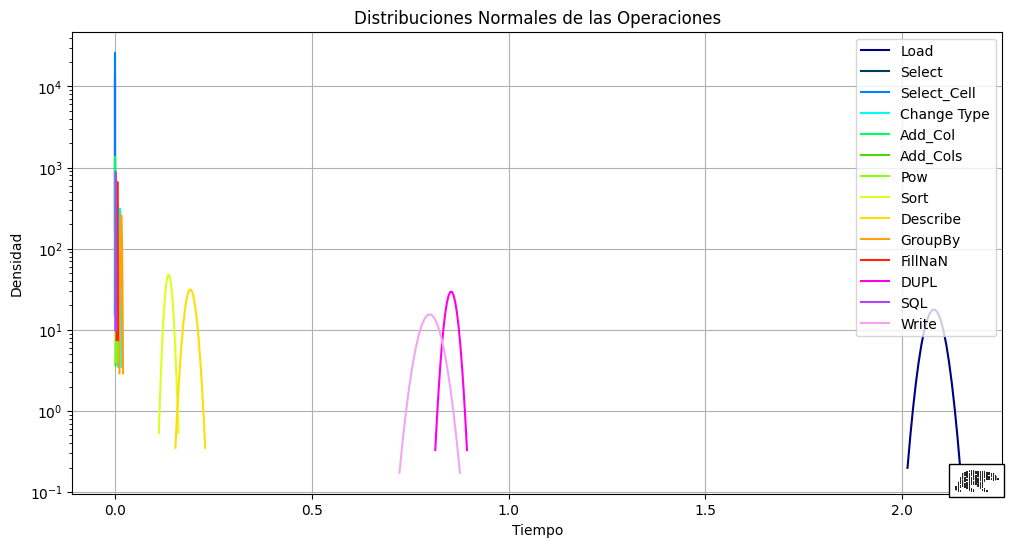

In [31]:
means = total_metrics.mean()
stds = total_metrics.std()
plt.figure(figsize=(12, 6))
ax= plt.subplot(1,1,1)
ax.set_adjustable("datalim")
colormap = cm.gist_ncar
normalize = mcolors.Normalize(vmin=0, vmax=means.width)

for i,col in enumerate(total_metrics.columns):
    mean = means[col]
    std = stds[col]
    x = np.linspace(mean - 3*std, mean + 3*std, NUM_REP)
    plt.plot(x, norm.pdf(x, mean, std), label=f'{col}',color = colormap(normalize(i)))

img = plt.imread("img/pl.png")
im = OffsetImage(img, zoom=.05)
ab = AnnotationBbox(im, (1, 0), xycoords='axes fraction', box_alignment=(1.1,-0.1))
ax.add_artist(ab)
plt.legend(loc='upper right')
plt.title('Distribuciones Normales de las Operaciones')
plt.xlabel('Tiempo')
plt.ylabel('Densidad')
plt.yscale('log')

plt.grid(True)
plt.show()

### Eliminando las 6 operaciones que consumen más tiempo

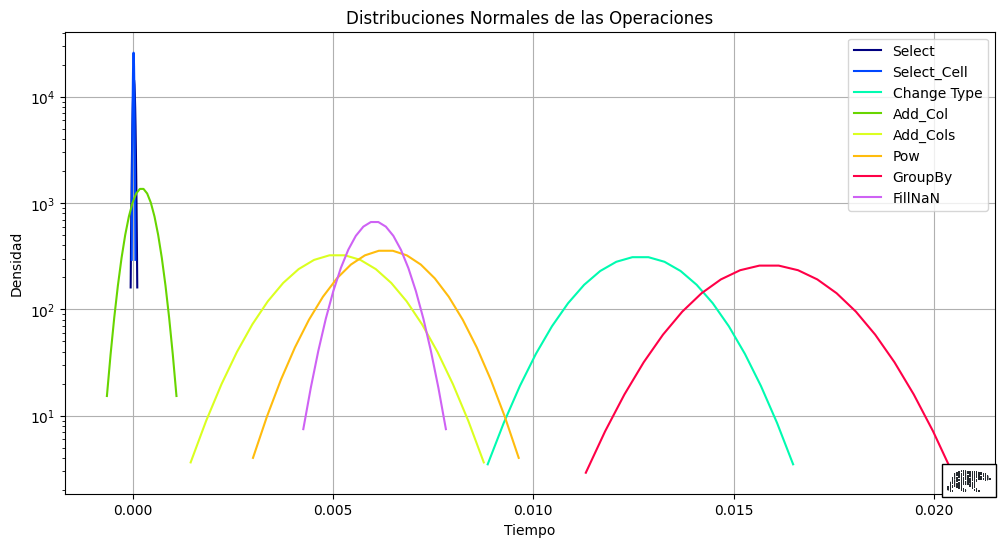

In [32]:
total_metrics= total_metrics.drop(["DUPL","SQL","Load","Write","Describe","Sort"])
means = total_metrics.mean()
stds = total_metrics.std()
plt.figure(figsize=(12, 6))
ax= plt.subplot(1,1,1)
ax.set_adjustable("datalim")
colormap = cm.gist_ncar
normalize = mcolors.Normalize(vmin=0, vmax=means.width)

for i,col in enumerate(total_metrics.columns):
    mean = means[col]
    std = stds[col]
    x = np.linspace(mean - 3*std, mean + 3*std, NUM_REP)
    plt.plot(x, norm.pdf(x, mean, std), label=f'{col}',color = colormap(normalize(i)))

img = plt.imread("img/pl.png")
im = OffsetImage(img, zoom=.05)
ab = AnnotationBbox(im, (1, 0), xycoords='axes fraction', box_alignment=(1.1,-0.1))
ax.add_artist(ab)
plt.legend()
plt.title('Distribuciones Normales de las Operaciones')
plt.xlabel('Tiempo')
plt.ylabel('Densidad')
plt.yscale('log')

plt.grid(True)
plt.show()

Un benchmark más intensivo se puede encontrar en:
https://h2oai.github.io/db-benchmark/

![DF](img/PolarTable.png)